In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_68557_G')

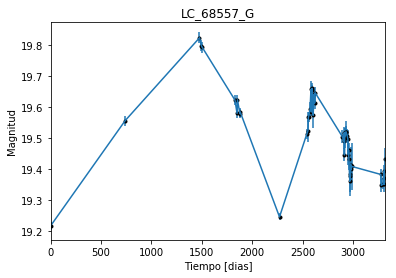

In [2]:
data = np.genfromtxt('LC_68557_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_68557_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

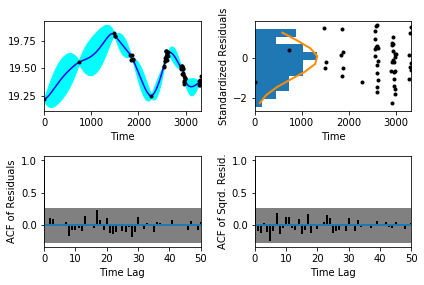

In [5]:
sample.assess_fit()

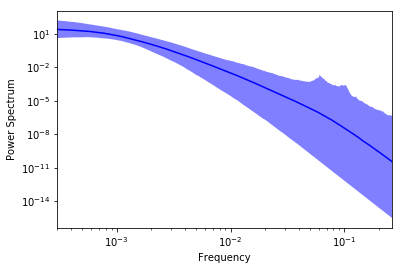

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_68557_G')

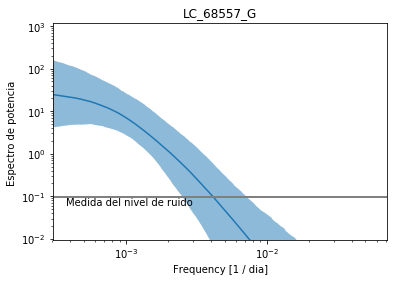

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_68557_G')

Text(0.5,1,'Prediccion , valor esperado LC_68557_G')

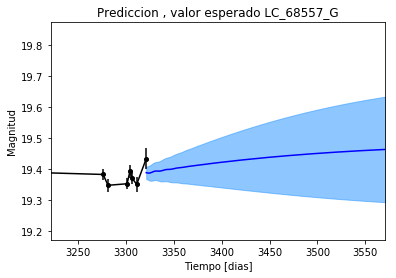

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_68557_G')

Text(0.5,1,'Prediccion, Caminos simulados LC_68557_G')

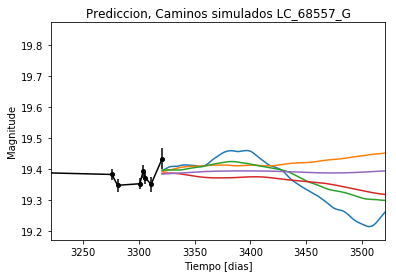

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_68557_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_68557_G')

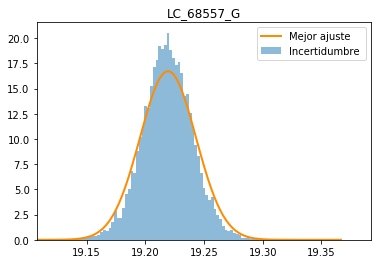

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_68557_G')

Text(0.5,1,'Interpolacion, camino simulado LC_68557_G')

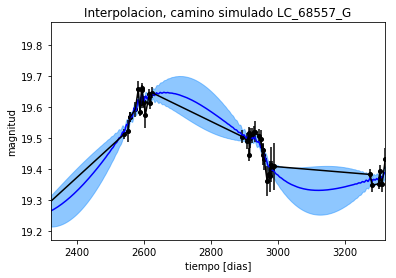

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68557_G')

Text(0.5,1,'Interpolacion, camino simulado LC_68557_G')

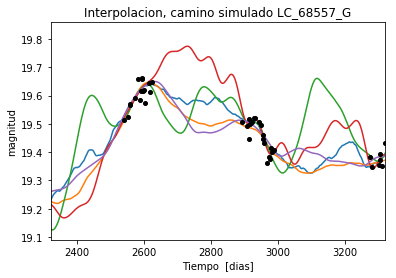

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68557_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1012.48179192
Median: 0.00539973354362
Standard deviation: 0.0966856677853
68% credibility interval: [ 0.00061486  0.08278771]
95% credibility interval: [  3.25559192e-04   3.92109773e-01]
99% credibility interval: [  3.06814107e-04   4.88687334e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1097.55154277
Median: 0.00129247024894
Standard deviation: 0.0385904840149
68% credibility interval: [ 0.0004312   0.01073835]
95% credibility interval: [ 0.00031617  0.10071967]
99% credibility interval: [  3.05840932e-04   3.06848408e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 860.517934231
Median: 0.0038825779004
Standar

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 760.862386741
Median: 109.710743578
Standard deviation: 1.69626974698
68% credibility interval: [ 107.89173168  110.8786028 ]
95% credibility interval: [ 105.36147656  112.27170552]
99% credibility interval: [ 103.52196173  113.56845415]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 421.210962954
Median: 0.205341475526
Standard deviation: 1.04726672349
68% credibility interval: [ 0.02822784  1.60706758]
95% credibility interval: [ 0.01140201  3.72609971]
99% credibility interval: [ 0.00915085  5.04164564]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 676.110722827
Median: 0.123914660363
Standard deviation: 2.04031490229
68% credibility interval: [ 0.00539661  1.51705882]
95% credibility interval: [  6.95258298e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 10060.3903179
Median: 8.75277359777e-19
Standard deviation: 2.5420395988e+123
68% credibility interval: [  8.05292062e-44   1.86093367e-03]
95% credibility interval: [  3.69348027e-82   2.69415511e+83]
99% credibility interval: [  2.45705262e-100   7.49624592e+100]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2400.79638277
Median: 19.4788318192
Standard deviation: 0.11775479941
68% credibility interval: [ 19.38050696  19.56832761]
95% credibility interval: [ 19.2393518   19.71623371]
99% credibility interval: [ 19.07687745  19.87815491]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 405.588683273
Median: 0.00669327571152
Standard deviation: 0.111069461295
68% credibility interval: [ 0.          0.13014924]
95% credibility interval: [ 0.          0.43572314]
99% credibility interval: [ 0.          0.49400877]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 405.588683273
Median: 0.00669327571152
Standard deviation: 0.111069461295
68% credibility interval: [ 0.          0.13014924]
95% credibility interval: [ 0.          0.43572314]
99% credibility interval: [ 0.          0.49400877]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1566.0397485
Median: 0.0
Standard deviation: 0.00040252868119
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 760.862386741
Median: 109.710743578
Standard deviation: 1.69626974698
68% credibility interval: [ 107.89173168  110.8786028 ]
95% credibility interval: [ 105.36147656  112.27170552]
99% credibility interval: [ 103.52196173  113.56845415]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 745.917406657
Median: 0.0495145235325
Standard deviation: 0.070055465548
68% credibility interval: [ 0.02973389  0.10081241]
95% credibility interval: [ 0.01869951  0.23755837]
99% credibility interval: [ 0.01464289  0.51457   ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 894.700513101
Median: 1.1646269028
Standard deviation: 0.20037391532
68% credibility interval: [ 0.9852831   1.37627074]
95% credibility interval: [ 0.82855838  1.61539914]
99% credibility interval: [ 0.74543975  1.79207191]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 295.83573949
Median: 2.49498731958e-05
Standard deviation: 0.0116531163014
68% credibility interval: [  5.41674892e-07   4.18914036e-04]
95% credibility interval: [  2.33254881e-88   3.30308892e-03]
99% credibility interval: [  6.16635191e-106   3.19485263e-002]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1012.48179192
Median: (-0.033927526464-0.320083878748j)
Standard deviation: 0.925241302203
68% credibility interval: [-0.52017055-1.57104908j -0.00386325-0.59706868j]
95% credibility interval: [ -2.46369836e+00+0.j          -2.04554873e-03-0.48960174j]
99% credibility interval: [ -3.07051308e+00+0.j          -1.92776989e-03-0.03170417j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1097.55154277
Median: (-0.0081208300781+0.502625770001j)
Standard deviation: 0.738792806911
68% credibility interval: [-0.06747103+0.77432907j -0.00270931+0.43033674j]
95% credibility interval: [-0.63284032+2.05464251j -0.00198656+0.01747774j]
99% credibility interval: [ -1.92798541e+00+1.80836269j  -1.92165525e-03+1.1595835j ]
Posterior s